# Машинное обучение, ВМК МГУ

## Практическое задание 3. Метод опорных векторов и логистическая регрессия

### Общая информация

Дата выдачи: 8 ноября 2022

Мягкий дедлайн: 23:30MSK 22 ноября 2022 (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: 23:30MSK 29 ноября 2021.

### О задании

В этом задании вы:
- настроите метод опорных векторов, визуализируете опорные вектора
- познакомитесь с калибровочными кривыми и сравните вероятности, выдаваемые логистической регрессией и методом опорных векторов
- изучите методы работы с категориальными переменными
- в качестве бонуса попробуете библиотеку vowpal wabbit.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — **10 баллов + 4.8 бонусов**.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

<p style="color:#de3815;font-size:25px;">
Напоминание об оформлении и выполнении ноутбука
</p>

* Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть, не запуская ячейки (кроме редких случаев, когда необходимо намеренно скрыть ненужный output, про такие случаи желательно писать пояснения в тексте). **В противном случае -1 балл**
* При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. **Не нужно** удалять и видоизменять написанный код и текст, если явно не указана такая возможность. Создавать новые ячейки с кодом/текстов там, где это осмысленно и вы считаете необходимым, конечно, можно. **В противном случае -1 балл**
* В anytask обязательно нужно прикреплять отдельно файл с расширением ipynb (не в архиве, а именно отдельно). Если необходимо отправить еще какие-то файлы, то вынесите их в отдельный архив (если файлов много) и пришлите. **В противном случае -0.5 балла**
---
* Пишите, пожалуйста, выводы и ответы на вопросы в текстовых ячейках/при помощи print в коде/как результат вывода ячейки. При их отсутствии мы не можем понять, сделали ли вы задание и понимаете, что происходит, и **поэтому будем снижать баллы**
* Если алгоритм не сказано реализовывать явно, его всегда можно импортировать из библиотеки.
---
* Про графики. _Штрафы будут применяться к каждому результату команды отображения графика (plt.show() и др. аналогичные). Исключением являются графики, генерируемые функциями каких-либо сторонних библиотек, если их нельзя кастомизировать_

    * должно быть название (plt.title) графика; **В противном случае &ndash; -0.05 балла**
    * на графиках должны быть подписаны оси (plt.xlabel, plt.ylabel); **В противном случае &ndash; -0.025 балла за каждую ось**
    * должны быть подписаны единицы измерения (если это возможно); **В противном случае &ndash; -0.025 балла за каждую ось**
    * все названия должны быть понятны любому человеку, знакомому с терминологией, без заглядывания в код; **В противном случае &ndash; -0.05 балла**
    * подписи тиков на осях не должны сливаться как на одной оси, так и между ними; **В противном случае &ndash; -0.025 балла за каждую ось**
    * если изображено несколько сущностей на одном холсте (например несколько функций), то необходима поясняющая легенда (plt.legend); **В противном случае &ndash; -0.05 балла**
    * все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном); **В противном случае &ndash; -0.05 балла**
    * если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
    * графики должны быть не супер-микро и не супер-макро по размерам, так, чтобы можно было увидеть все, что нужно.
    * при необходимости улучшения наглядности графиков, можно пользоваться логарифмической шкалой по осям x/y.
    
### А также..

* Для удобства поиска вопросов, на которые от вас просят ответа, мы пометили их знаком **(?)**
* Знак **(!)** означает, что выполнение замечания необходимо для **возможности получения полного балла**
* Даем до +0.3 баллов за выдающиеся успехи по субъективному мнению проверяющих. Этот **бонус** не апеллируется

In [ ]:
%pylab inline
import pandas as pd

from sklearn.datasets import load_diabetes, make_classification
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


## Часть 1. Линейная регрессия

В этой части мы кратко познакомимся с линейной регрессией.

Для начала загрузим данные и разделим их на обучающую и тестовую выборки в соотношении 7 к 3.

In [ ]:
data = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=0.7, random_state=241)

__Задание 1.__ Обучение линейной регрессии.

**(1 балл)**

Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Выведите  количество коэффициентов (веса, они же составляют вектор w) близких к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа **ненулевых коэффициентов от коэффицента регуляризации** (перебирайте значения по _логарифмической сетке_ от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями? 

**Замечания:**
* Используйте модели из sklearn
* Можно строить графики с учетом $w_0$ (bias), можно без **(обязательно поясните, как в итоге строили),**  однако стоит учитывать, что $w_0 \approx 0$ несет другой смысл, нежели чем $w_i \approx 0$.
* Перебор по логарифмической сетке от $10^{-3}$ до $10^{3}$ подразумевает **равномерный перебор по степеням:** $10^{-3}, 10^{-2}, 10^{-1}, 10^{0}$ итд. Однако ничего не мешает (и не будет лишним) сделать и более частую равномерную сетку, если позволяет время вычислений. Менее частую сетку лучше делать в тех случаях, когда вычисления совсем запредельные по времени, однако помните, что делание выводов о какой-либо зависимости по 3-4 точкам может привести к ошибочным результатам **(и такое будет засчитываться как ошибка, если не пояснено, почему нельзя было сделать больше точек)**

In [ ]:
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Coefficients(num) of Ridge which are close to zero 0
Coefficients(num) of Lasso which are close to zero 7


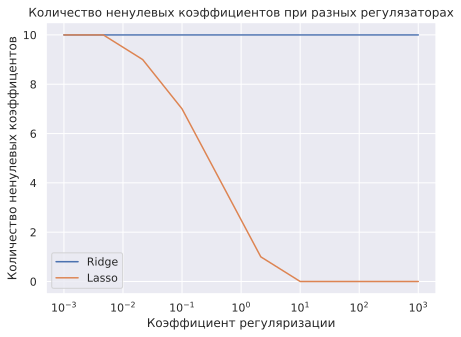

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

# Графики будем строить без учета w_0

EPS = 1e-2
from sklearn.linear_model import Lasso, Ridge
clf_ridge = Ridge()
clf_ridge.fit(X_train, y_train)
print("Coefficients(num) of Ridge which are close to zero",
        np.sum(np.abs(clf_ridge.coef_) < EPS))

clf_lasso = Lasso()
clf_lasso.fit(X_train, y_train)
print("Coefficients(num) of Lasso which are close to zero",
      np.sum(np.abs(clf_lasso.coef_) < EPS))

alpha_list = np.logspace(-3, 3, 10)
zeron_ridge = []
zeron_lasso = []
plt.figure(figsize=(7, 5))
for alpha in alpha_list:
    clf_ridge = Ridge(alpha=alpha)
    clf_ridge.fit(X_train, y_train)
    zeron_ridge.append(np.sum(~np.isclose(clf_ridge.coef_, 0)))
    
    clf_lasso = Lasso(alpha=alpha)
    clf_lasso.fit(X_train, y_train)
    zeron_lasso.append(np.sum(~np.isclose(clf_lasso.coef_, 0)))
sns.lineplot(x=alpha_list, y=zeron_ridge, legend=False)
plot = sns.lineplot(x=alpha_list, y=zeron_lasso, legend=False)
plot.legend(["Ridge", "Lasso"])
plot.set_xscale("log")
plot.set_xlabel("Коэффициент регуляризации")
plot.set_ylabel("Количество ненулевых коэффицентов")
plot.set_title('Количество ненулевых коэффициентов при разных регулязаторах')
None

Результаты согласуются с моими ожиданиями, так как lasso должен обнулять коэффициенты в отличие от ridge

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
clf = Ridge()
clf.fit(X_train, y_train)
print("R2 :", r2_score(y_test, clf.predict(X_test)))
print("RMSE :", mean_squared_error(y_test, clf.predict(X_test), squared=False))
print("MAE :", mean_absolute_error(y_test, clf.predict(X_test)))

R2 : 0.3598993868368464
RMSE : 58.304415127748044
MAE : 49.60284607275299


Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости трех перечисленных выше метрик от коэффициента регуляризации. Заметно ли изменилось качество?

**Замечание:** функцию потерь на выборке (X, y) можно, например, посчитать вручную, вытащив коэффициенты из модели (обычно это атрибут coef_) и учитывая коэффициент регуляризации $\alpha$.

r2 {'alpha': 0.001}
root_mean_squared_error {'alpha': 0.001}
mean_absolute_error {'alpha': 0.001}


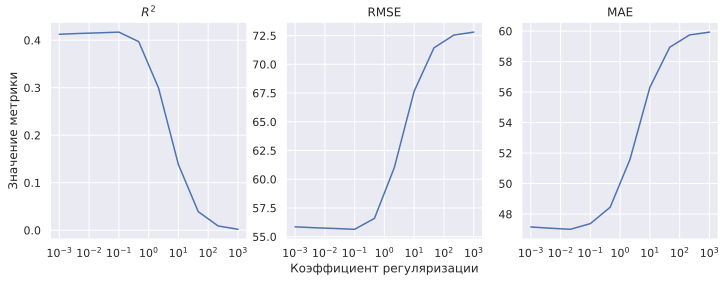

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import KFold, GridSearchCV


alpha_list = np.logspace(-3, 3, 10)
params = {"alpha": alpha_list}
clf_ridge = Ridge()
metric_list = ('r2', 'neg_root_mean_squared_error', 'neg_mean_absolute_error')
metric_func = {'r2': r2_score, 
                'neg_root_mean_squared_error': mean_squared_error,
                'neg_mean_absolute_error': mean_absolute_error}
best_clf = dict()
for metric in metric_list:
    best_clf[metric] = GridSearchCV(clf_ridge, param_grid=params, scoring=metric)
    best_clf[metric].fit(X_train, y_train)
    print(metric.replace('neg_', ''), best_clf[metric].best_params_)

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
titles = ("$R^2$", 'RMSE', 'MAE')
x_ticks =[0.001, 0.01, 0.1, 1, 10, 100, 1000]
for idx, metric in enumerate(metric_list):
    metric_val_list = []
    for alpha in alpha_list:
        clf_ridge = Ridge(alpha=alpha)
        clf_ridge.fit(X_train, y_train)
        if metric != 'neg_root_mean_squared_error':
            metric_val_list.append(
                metric_func[metric](y_test, clf_ridge.predict(X_test)))
        else:
            metric_val_list.append(
                metric_func[metric](y_test, clf_ridge.predict(X_test), squared=False))
    plot = sns.lineplot(x=alpha_list, y=metric_val_list, legend=False,
                        ax=axs[idx])
    axs[idx].set_title(titles[idx])
    axs[idx].set_xscale('log')
    axs[idx].set_xticks(x_ticks)
    if metric_list.index(metric) == 1:
        plot.set_xlabel('Коэффициент регуляризации')
    if metric_list.index(metric) == 0:
        plot.set_ylabel('Значение метрики')
    
    #plot.title([r'$R^2$', 'RMSE', 'MAE'])
        

__Задание 2.__ Поиск объектов-выбросов

**(0.5 балла)**

Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?

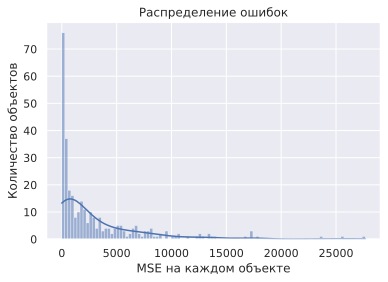

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.model_selection import cross_val_predict
prediction = cross_val_predict(Ridge(0.001), X_train, y_train, cv=KFold(5))
sns.histplot((prediction - y_train) ** 2, bins=100, kde=True)
plt.ylabel("Количество объектов")
plt.xlabel("MSE на каждом объекте")
plt.title("Распределение ошибок")
None


**Ответ:**  
Из данной гистограммы можно предположить, что в наших данных есть объекты выбросы(как раз потому что mse сильно штрафует на объектах выбросах)

Попробуйте удалить объекты-выбросы из обучающей выборки (что считать или не считать выбросами на ваше усмотрение). Обучите модель заново и посмотрите на качество на отложенной (или, называемой валидационной) (X_test, y_test) выборке (учитывайте, что там тоже могут быть выбросы, с которыми вы ничего не можете сделать). Стало ли лучше? Чем вы можете объяснить это?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import accuracy_score
clf = Ridge()
clf.fit(X_train, y_train)
print("MAE before deleting outliers", mean_absolute_error(y_test, clf.predict(X_test)))
print("RMSE before deleting outliers", mean_squared_error(y_test, clf.predict(X_test),
                                                          squared=False))
print("R2 before deleting outliers", r2_score(y_test, clf.predict(X_test)))

idxs = (prediction - y_train) ** 2 < 20000
print('--------------------------------------------------')
clf.fit(X_train[idxs], y_train[idxs])
print("MAE after deleting outliers", mean_absolute_error(y_test, clf.predict(X_test)))
print("RMSE after deleting outliers", mean_squared_error(y_test, clf.predict(X_test),
                                                          squared=False))
print("R2 after deleting outliers", r2_score(y_test, clf.predict(X_test)))

MAE before deleting outliers 49.60284607275299
RMSE before deleting outliers 58.304415127748044
R2 before deleting outliers 0.3598993868368464
--------------------------------------------------
MAE after deleting outliers 49.51017813250849
RMSE after deleting outliers 58.16587093855665
R2 after deleting outliers 0.3629378138914673


**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ** Стало немного лучше. Объясняется это тем, что модель подстраивалась на выбросы в ущерб объктам-невыбросам и засчет этого мы получали большую ошибку.

## Часть 2. Метод опорных векторов и калибровка вероятностней

Сгенерируем синтетические данные.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

__Задание 1.__ Обучение и применение метода опорных векторов.

__(1 балл)__

Обучите метод опорных векторов. На занятиях мы проходили обычный вариант, что соответствует линейному ядру (LinearSVC/LinearSVR в scikit-learn).

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.svm import LinearSVC
clf_svc = LinearSVC(dual=False)
clf_svc.fit(X_train, y_train)

LinearSVC(dual=False)

На тестовой части посчитайте ROC-AUC, PR-AUC. Постройте ROC и PR кривые.

PR-AUC : 0.9247579503393881
ROC-AUC 0.9258632664291409


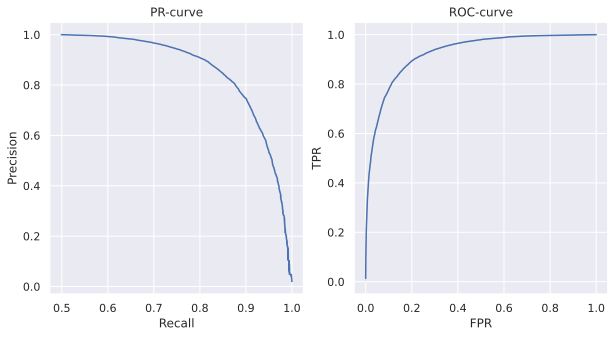

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import average_precision_score

recall, precision, thresholds = precision_recall_curve(y_test, clf_svc.decision_function(X_test))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot = sns.lineplot(x=recall, y=precision, legend=False, ax=ax1)
plot.set_xlabel("Recall")
plot.set_ylabel("Precision")
plot.set_title("PR-curve")
print("PR-AUC :", average_precision_score(y_test, clf_svc.decision_function(X_test)))

fpr, tpr, thresholds = roc_curve(y_test, clf_svc.decision_function(X_test))
plot = sns.lineplot(x=fpr, y=tpr, legend=False, ax=ax2)
plot.set_xlabel("FPR")
plot.set_ylabel("TPR")
plot.set_title("ROC-curve")
print("ROC-AUC", auc(fpr, tpr))
None

В названии метода присутствуют некоторые "опорные векторы". Сгенерируйте синтетический датасет с помощью make_classification с 2 признаками (хотя бы 100 объектов, но желательно больше), обучите на нём метод опорных векторов. Визуализируйте разделяющую прямую, все объекты и выделите опорные вектора (атрибут support\_vectors\_). В этот раз вместо LinearSVC воспользуйтесь SVC с линейным ядром (kernel='linear'), так как только в нём есть информация об опорных векторах.

**Замечания:**
* Графики должны быть оформлены правильно, в соответствии с теми требованиями, которые были в первой лабороторной. Так же опорные вектора следует рисовать не другим цветом, а другой **меткой** (например, крестик), иначе теряется принадлежность к классу. Точки из разных классов рисуйте **разными цветами** (или разными фигурами). Если необходимо, можно вводить альфа-канал (степень прозрачности) для улучшения восприятия. Можно (и очень рекомендуется) рисовать не только разделяющую прямую, но из "разделяющую полосу" вокруг прямой.
* **Обязательно пишите легенду,** поясняющую что изображено на полотне.

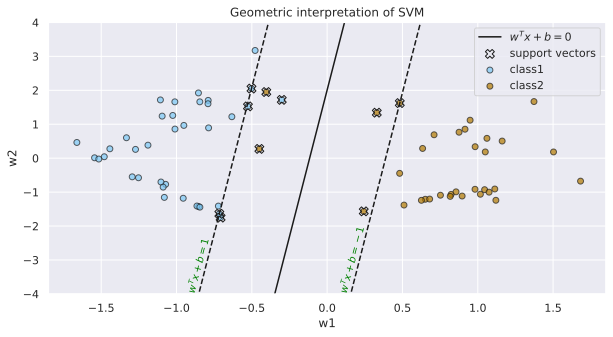

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.svm import SVC
import matplotlib
X, y = make_classification(
    n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_repeated=0,
    random_state=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=43)
clf_svc = SVC(kernel='linear')
clf_svc.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(10, 5))
w = clf_svc.coef_[0]
b = clf_svc.intercept_[0]
xx = np.linspace(-1.8 , 1.8)

ax.plot(xx, -xx * w[0] / w[1] - b / w[1], 'k-', label='$w^Tx + b = 0$')
ax.plot(xx, -xx * w[0] / w[1] - (b - 1) / w[1], 'k--')
ax.text(0.08, -3.95, '$w^Tx + b = -1$', rotation=75, color='green', fontsize=10)
ax.plot(xx, -xx * w[0] / w[1] - (b + 1) / w[1], 'k--')
ax.text(-0.93, -3.95, '$w^Tx + b = 1$', rotation=75, color='green', fontsize=10)
ax.set_ylim(-4, 4)
ax.set_xlim(-1.85, 1.85)
ax.set_xlabel("w1")
ax.set_ylabel('w2')
ax.set_title("Geometric interpretation of SVM")

scatter = ax.scatter(x=clf_svc.support_vectors_[:, 0],
            y=clf_svc.support_vectors_[:, 1],
            s=80,
            marker='X',
            edgecolors='k',
            facecolors='none',
            zorder=10, 
            label="support vectors")
cdict = {'class1': 'xkcd:lightblue', 'class2': 'xkcd:golden brown'}
for i, class_ in enumerate(['class1', 'class2']):
    idx = np.where(y_train == i)
    scatter = ax.scatter(x=X_train[idx][:, 0], y=X_train[idx][:, 1], c=cdict[class_],
                        edgecolor='k', label=class_, alpha=0.7)

legend = ax.legend()


__Задание 2.__ Калибровка вероятностей.

__(1.5 балла)__

Перейдём к оценке качества выдаваемых алгоритмами вероятностей. Начнём с калибровочных кривых. 

Допустим, алгоритм возвращает некоторые числа от нуля до единицы. Хорошо ли они оценивают вероятность? Для этого разобьем отрезок $[0, 1]$ на несколько маленьких отрезков одинаковой длины. Рассмотрим $i$-й отрезок с границами $[a_i, b_i]$ и предсказания $p_1, p_2, \dots, p_k$, которые попали в него. Пусть им соответствуют истинные ответы $y_1, y_2, \dots, y_k$. Если алгоритм выдает корректные вероятности, то среди этих истинных ответов должно быть примерно $(a_i + b_i) / 2$ единиц. Иными словами, если нарисовать кривую, у которой по оси X отложены центры отрезков, а по оси Y — доли единичных ответов этих в отрезках, то она должна оказаться диагональной. Ниже приведена функция, которая должна рисовать такие кривые. В ней допущено две ошибки — найдите и исправьте их.

In [ ]:
def plot_calibration_curve(y_test, preds):
    bin_middle_points = []
    bin_real_ratios = []
    n_bins = 20
    for i in range(n_bins):
        l = 1.0 / n_bins * i
        r = 1.0 / n_bins * (i + 1)
        bin_middle_points.append((r + l) / 2) # 
        bin_real_ratios.append(np.mean(y_test[(preds >= l) & (preds < r)] == 1))
    plt.plot(bin_middle_points, bin_real_ratios)

Постройте калибровочные кривые для логистической регрессии и метода опорных векторов. Изучите распределение ответов классификаторов (постройте гистограммы с помощью plt.hist). Чем они различаются? Чем вы можете объяснить это?

Заметим, что метод опорных векторов не умеет predict_proba, но имеет метод decision_function.

In [ ]:
X, y = make_classification(
    n_samples=100000, n_features=20, n_informative=10, n_redundant=10,
    random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.linear_model import LogisticRegression
clf_log = LogisticRegression()
clf_log.fit(X_train, y_train)

clf_svc = LinearSVC(dual=False)
clf_svc.fit(X_train, y_train)


LinearSVC(dual=False)

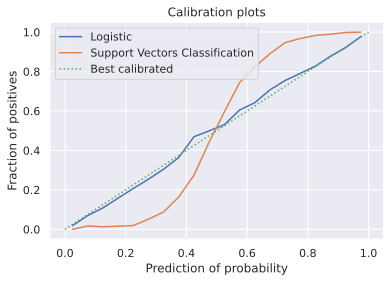

In [ ]:
#print(clf_svc.decision_function(X_test))
#print(clf_log.classes_)
#print(clf_log.predict_proba(X_test)[:, 1])
from scipy.special import expit
plot_calibration_curve(y_test, clf_log.predict_proba(X_test)[:, 1])
plot_calibration_curve(y_test, expit(clf_svc.decision_function(X_test)))
x = np.linspace(0, 1)
plt.plot(x, x, linestyle='dotted')
plt.xlabel('Prediction of probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plots')
plt.legend(['Logistic', 'Support Vectors Classification', 'Best calibrated'])
None

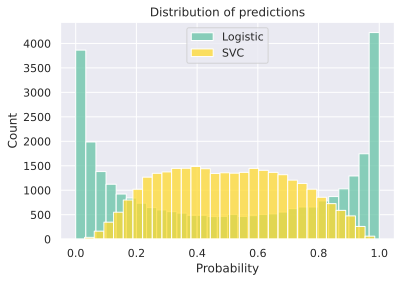

In [ ]:
sns.histplot(clf_log.predict_proba(X_test)[:, 1], label='Logistic', color=sns.color_palette("Set2")[0], bins=30)
sns.histplot(expit(clf_svc.decision_function(X_test)), label="SVC", color=sns.color_palette("Set2")[5], bins=30)
plt.xlabel("Probability")
plt.title("Distribution of predictions")
plt.legend()
None

**Ответ:** 
1. Про SVC: гиперплоскость как бы равноудалена от классов + сигмоида симметрична относительно нуля, поэтому вероятность будет симметрична 
2. Про Logistic: поскольку в лоссе есть вероятность и лосс тем меньше чем вероятность принадлежности объекта к определенному классу больше, то поэтому получаем такое распрделение.

Воспользуйтесь CalibratedClassifierCV из sklearn для калибровки вероятностей метода опорных векторов на обучении и постройте с его помощью предсказания для тестовой выборки. Нарисуйте для них калибровочную кривую. Улучшилась ли она?

In [ ]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(LinearSVC(dual=False), cv=5)
calibrated_svc.fit(X_train, y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(dual=False), cv=5)

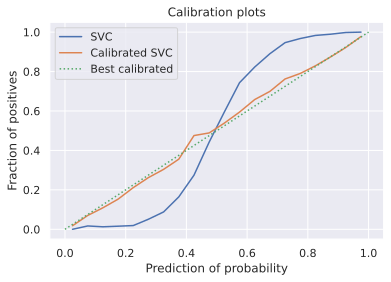

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

plot_calibration_curve(y_test, expit(clf_svc.decision_function(X_test)))
plot_calibration_curve(y_test, calibrated_svc.predict_proba(X_test)[:, 1])

x = np.linspace(0, 1)
plt.plot(x, x, linestyle='dotted')
plt.xlabel('Prediction of probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plots')
plt.legend(['SVC', 'Calibrated SVC', 'Best calibrated'])
None

Да, улучшилась. Чем больше калибровочная кривая похожа на y=x тем лучше откалиброван метод.

__Бонусное задание (1 балл).__ Реализуйте свою функцию для калибровки вероятностей. Опишите ваш подход и продемонстрируйте результаты.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

## Часть 3. Логистическая регрессия.

__Задание 3.__ Обучение логистической регрессии на реальных данных и оценка качества классификации.

**(0.5 балл)**

__Подготовка данных.__

Загрузим данные с конкурса  [Kaggle Porto Seguro’s Safe Driver Prediction](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction) (вам нужна только обучающая выборка). Задача состоит в определении водителей, которые в ближайший год воспользуются своей автомобильной страховкой (бинарная классификация). Но для нас важна будет не сама задача, а только её данные. При этом под нужды задания мы немного модифицируем датасет.

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/ml/task3

/content/drive/MyDrive/Colab Notebooks/ml/task3


In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)

Пересемплируем выборку так, чтобы положительных и отрицательных объектов в выборке было одинаковое число. Разделим на обучающую и тестовую выборки.


In [ ]:
# some resampling
np.random.seed(910)
mask_plus = np.random.choice(np.where(target == 1)[0], 100000, replace=True)
mask_zero = np.random.choice(np.where(target == 0)[0], 100000, replace=True)

data = pd.concat((data.iloc[mask_plus], data.iloc[mask_zero]))
target = np.hstack((target[mask_plus], target[mask_zero]))

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.5)

Обучите логистическую регрессию с удобными для вас параметрами. Сделайте предсказание на тестовой части выборки.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
clf_log = LogisticRegression(max_iter=5000)
clf_log.fit(X_train, y_train)
prediction = clf_log.predict(X_test)

Постройку ROC-кривую и Precision-Recall-кривую, посчитайте ROC-AUC и PR-AUC. Какие наблюдения и выводы по ним можно сделать? (В свободной форме)

PR-AUC : 0.6129414814895907
ROC-AUC 0.6251239834017854


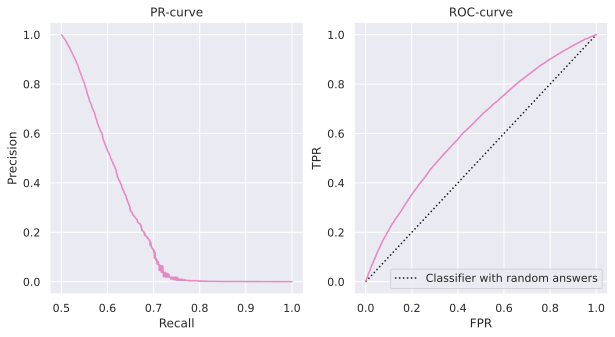

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

recall, precision, thresholds = precision_recall_curve(y_test, clf_log.decision_function(X_test))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plot = sns.lineplot(x=recall, y=precision, legend=False, ax=ax1,
                    color=sns.color_palette("Set2")[3])
plot.set_xlabel("Recall")
plot.set_ylabel("Precision")
plot.set_title("PR-curve")
print("PR-AUC :", average_precision_score(y_test, clf_log.decision_function(X_test)))

fpr, tpr, thresholds = roc_curve(y_test, clf_log.decision_function(X_test))
x = np.linspace(0,1)
sns.lineplot(x=x, y=x, legend=False, ax=ax2,
                    color='k', linestyle='dotted', label='Сlassifier with random answers')

plot = sns.lineplot(x=fpr, y=tpr, legend=False, ax=ax2,
                    color=sns.color_palette("Set2")[3])

plot.set_xlabel("FPR")
plot.set_ylabel("TPR")
plot.set_title("ROC-curve")
plot.legend()
print("ROC-AUC", auc(fpr, tpr))

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

Можно сказать, что модель лучше работает чем случайный классификатор.



__Задание 4.__ Изучение влияния регуляризатора на процесс обучения

__(1 балл)__

Проверьте на практике, как влияет регуляризатор на процесс обучения (убывание функции потерь на обучающей и отложенной выборках). Чтобы считать функцию потерь на отложенной выборке после каждой итерации, можно воспользоваться параметром `warm_start` у `sklearn.linear_model.LogisticRegression` либо методом `partial_fit` `sklearn.linear_model.SGDClassifier` (параметр `loss` тогда должен быть равен `log`).

Замечание:
* Для каждого $\alpha$ своя функция на графике; функции можно отображать на одном полотне **обязательно с легендой;** если $\alpha$ слишком много и на одном полотне они выглядят грязно, то можно строить на нескольких, однако в этом случае рекомендуется приводить масштаб и деления (min, max значения) на оси $y$ к одним  и тем же значениям --- так визуально будет очень просто сравнить графики и сделать выводы :)
* $\alpha$ желательно перебирать по **логарифмической шкале** (примерно как в первом задании), однако можно использовать информацию о том, что при некоторых значениях $\alpha$ модель не обучается хорошо и не исследовать их. Тут обязательно перебрать хотя бы 3 разных (степени в лог. шкале) $\alpha$, больше -- приветствуется.

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

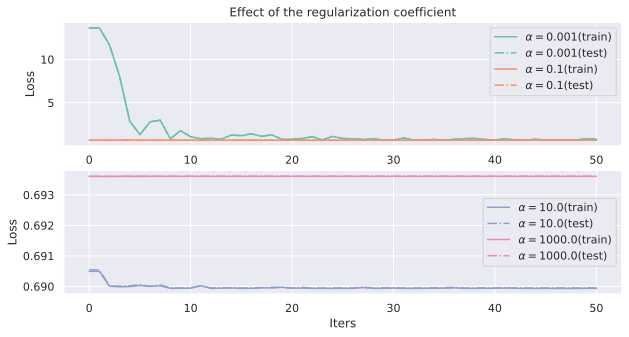

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from tqdm.notebook import tqdm 
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
edge = 2
alpha_list = np.logspace(-3, 3, 4)
classes = np.unique(y_train)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
for i, alpha in tqdm(enumerate(alpha_list[:edge])):
    clf = SGDClassifier(alpha=alpha, loss='log', warm_start=True)
    clf.partial_fit(X_train, y_train, classes=classes)
    score_train = [log_loss(y_train, clf.predict_proba(X_train)[:, 1])]
    score_test = [log_loss(y_test, clf.predict_proba(X_test)[:, 1])]
    weights = None
    max_iters = 50
    for iter in tqdm(range(max_iters)):
        score_train.append(log_loss(y_train, clf.predict_proba(X_train)[:, 1]))
        score_test.append(log_loss(y_test, clf.predict_proba(X_test)[:, 1]))
        clf.partial_fit(X_train, y_train)
    g =sns.lineplot(x=range(max_iters + 1), y=score_train, 
                 legend=False, 
                 color=sns.color_palette('Set2')[i], ax=ax1)
    sns.lineplot(x=range(max_iters + 1), y=score_test, 
                 legend=False,
                 color=sns.color_palette('Set2')[i],
                 linestyle='-.', ax=ax1)
legend_labels = []
for alpha in alpha_list[:edge]:
    legend_labels.append(r'$\alpha={}$'.format(round(alpha, 4)) + '(train)')
    legend_labels.append(r'$\alpha={}$'.format(round(alpha, 4)) + '(test)')
g.legend(legend_labels)
g.set_xlabel('Iters')
g.set_ylabel("Loss")
g.set_title('Effect of the regularization coefficient')

for i, alpha in tqdm(enumerate(alpha_list[edge:])):
    clf = SGDClassifier(alpha=alpha, loss='log', warm_start=True)
    clf.partial_fit(X_train, y_train, classes=classes)
    score_train = [log_loss(y_train, clf.predict_proba(X_train)[:, 1])]
    score_test = [log_loss(y_test, clf.predict_proba(X_test)[:, 1])]
    weights = None
    max_iters = 50
    for iter in tqdm(range(max_iters)):
        score_train.append(log_loss(y_train, clf.predict_proba(X_train)[:, 1]))
        score_test.append(log_loss(y_test, clf.predict_proba(X_test)[:, 1]))
        clf.partial_fit(X_train, y_train)
    sns.lineplot(x=range(max_iters + 1), y=score_train, 
                 legend=False, 
                 color=sns.color_palette('Set2')[i + edge], ax=ax2)
    sns.lineplot(x=range(max_iters + 1), y=score_test, 
                 legend=False,
                 color=sns.color_palette('Set2')[i + edge],
                 linestyle='-.', ax=ax2)
legend_labels = []
for alpha in alpha_list[edge:]:
    legend_labels.append(r'$\alpha={}$'.format(round(alpha, 4)) + '(train)')
    legend_labels.append(r'$\alpha={}$'.format(round(alpha, 4)) + '(test)')
plt.legend(legend_labels)
plt.xlabel('Iters')
plt.ylabel("Loss")
None  

## Часть 4. Работа с категориальными переменными

В этой части мы научимся обрабатывать категориальные переменные, так как закодировать их в виде чисел недостаточно (это задаёт некоторый порядок, которого на категориальных переменных может и не быть). Существует два основных способа обработки категориальных значений:
- One-hot-кодирование
- Счётчики (CTR, mean-target кодирование, ...) — каждый категориальный признак заменяется на среднее значение целевой переменной по всем объектам, имеющим одинаковое значение в этом признаке.

Начнём с one-hot-кодирования. Допустим наш категориальный признак $f_j(x)$ принимает значения из множества $C=\{c_1, \dots, c_m\}$. Заменим его на $m$ бинарных признаков $b_1(x), \dots, b_m(x)$, каждый из которых является индикатором одного из возможных категориальных значений:
$$
b_i(x) = [f_j(x) = c_i]
$$

В этой части работаем с датасетом из предыдущей части.

__Задание 5.__ Посчитайте качество (в этом задании будем работать c ROC-AUC) на исходных признаках при применении логистической регрессии.

__(0 баллов)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fpr, tpr, thresholds = roc_curve(y_test, clf_log.decision_function(X_test))
rocauc = auc(fpr, tpr)
print("ROC-AUC", rocauc)

ROC-AUC 0.6251239834017854


In [ ]:
X_train.columns

Index(['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtype='obj

__Задание 6.__ Закодируйте все категориальные признаки с помощью one-hot-кодирования. Обучите логистическую регрессию и посмотрите, как изменилось качество модели (с тем, что было до кодирования). Измерьте время, потребовавшееся на обучение модели.

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import auc
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list)],
                                remainder='passthrough', 
                                verbose_feature_names_out=False)
pipe = Pipeline([('ohe', transformer),
                 ('logistic', LogisticRegression(max_iter=5000))])
start_time = time.time()
pipe.fit(X_train, y_train)
end_time = time.time()
print('time (s) :', end_time - start_time)
fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
print("ROC-AUC :", auc(fpr, tpr))

time (s) : 25.048338651657104
ROC-AUC : 0.6329087839138864


Как можно было заменить, one-hot-кодирование может сильно увеличивать количество признаков в датасете, что сказывается на памяти, особенно, если некоторый признак имеет большое количество значений. Эту проблему решает другой способ кодирование категориальных признаков — счётчики. Основная идея в том, что нам важны не сами категории, а значения целевой переменной, которые имеют объекты этой категории. Каждый категориальный признак мы заменим средним значением целевой переменной по всем объектам этой же категории:
$$
g_j(x, X) = \frac{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)][y_i = +1]}{\sum_{i=1}^{l} [f_j(x) = f_j(x_i)]}
$$

Отметим, что такие признаки сами по себе являются классификаторами и, обучаясь на них, мы допускаем "утечку" целевой переменной в признаки. Это ведёт к переобучению, поэтому считать такие признаки необходимо таким образом, чтобы при вычислении для конкретного объекта его целевая метка не использовалась. Это можно делать следующими способами:
1. Вычислять значение счётчика по всем объектам расположенным выше в датасете (например, если у нас выборка отсортирована по времени).
2. Вычислять по фолдам, то есть делить выборку на некоторое количество частей и подсчитывать значение признаков по всем фолдам кроме текущего (как делается в кросс-валидации).
3. Внесение некоторого шума в посчитанные признаки. 

__(Бонусная часть)__ Закодируйте категориальные переменные с помощью счётчиков (ровно так, как описано выше без каких-либо хитростей). Реализуйте корректное вычисление счётчиков самым простым способом — добавление шума к значениям (необходимо соблюсти баланс между избавление от переобучения и полезностью признаков). Снова обучите логистическую регрессию, оцените качество. Сделайте выводы. Не забудьте замерить время.

__(+0.5 балл)__

In [ ]:
print(y_train)

[0 1 0 ... 0 0 0]


In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.base import BaseEstimator, TransformerMixin
class CounterEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, columns=None, y=None, noise=None, **kwargs):
        self.columns = columns
        self.noise = noise
        self.y = np.copy(y)
        self.kwargs = kwargs
    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        col_to_transform_list = X_.columns
        if not self.columns is None:
            col_to_transform_list = self.columns
        X_['target'] = self.y

        for col in col_to_transform_list:
            grouped = X_.groupby([col])
            count = grouped['target'].sum()
            frac = count / grouped.size()
            key_list = grouped.groups.keys()
            for key in key_list:
                X_.loc[X_[col] == key, col] = frac[key]
            X_[col] += self.noise(**self.kwargs)
        X_ = X_.drop(['target'], axis=1)
        return X_
                

In [ ]:

category_list = X_train.columns[X_train.columns.str.endswith('_cat')]

noise = np.random.default_rng(13).normal
#for scale in np.logspace(-1, 1, 10):
for loc in tqdm(np.linspace(-1, 1, 10)):
    noise_args = dict(loc=loc, scale=0, size=X_train.shape[0])
    pipe = Pipeline([('counterencoding', CounterEncoder(category_list, y_train,
                                                        noise, **noise_args)),
                    ('logistic', LogisticRegression(max_iter=5000))])
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    print('time (s) :', end_time - start_time)
    fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
    print("ROC-AUC :", auc(fpr, tpr))
    print("loc :", loc)
    print()

  0%|          | 0/10 [00:00<?, ?it/s]

time (s) : 27.94904398918152
ROC-AUC : 0.604922642710886
loc : -1.0

time (s) : 36.1063597202301
ROC-AUC : 0.6050838335132072
loc : -0.7777777777777778

time (s) : 25.444909811019897
ROC-AUC : 0.6048193183093982
loc : -0.5555555555555556

time (s) : 28.081031322479248
ROC-AUC : 0.6050798363131497
loc : -0.33333333333333337

time (s) : 52.41088628768921
ROC-AUC : 0.6051523391141936
loc : -0.11111111111111116

time (s) : 50.57599353790283
ROC-AUC : 0.6051756995145301
loc : 0.11111111111111116

time (s) : 66.62263655662537
ROC-AUC : 0.605231111115328
loc : 0.33333333333333326

time (s) : 60.41018199920654
ROC-AUC : 0.6051373363139776
loc : 0.5555555555555554

time (s) : 84.53410840034485
ROC-AUC : 0.6051720199144771
loc : 0.7777777777777777

time (s) : 69.52636694908142
ROC-AUC : 0.6055400539197768
loc : 1.0



In [ ]:
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]

noise = np.random.default_rng(13).normal
for scale in np.logspace(-1, 1, 10):
    noise_args = dict(loc=1, scale=scale, size=X_train.shape[0])
    pipe = Pipeline([('counterencoding', CounterEncoder(category_list, y_train,
                                                        noise, **noise_args)),
                    ('logistic', LogisticRegression(max_iter=5000))])
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    print('time (s) :', end_time - start_time)
    fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
    print("ROC-AUC :", auc(fpr, tpr))
    print("scale :", scale)
    print()

time (s) : 34.51340055465698
ROC-AUC : 0.6063616835316082
scale : 0.1

time (s) : 24.920141458511353
ROC-AUC : 0.6083258147598918
scale : 0.16681005372000587

time (s) : 21.588597774505615
ROC-AUC : 0.6095503867775256
scale : 0.2782559402207124

time (s) : 12.047447919845581
ROC-AUC : 0.6101286415858524
scale : 0.46415888336127786

time (s) : 16.71545648574829
ROC-AUC : 0.6099642047834846
scale : 0.774263682681127

time (s) : 19.26962971687317
ROC-AUC : 0.6105622819920968
scale : 1.291549665014884

time (s) : 16.559858798980713
ROC-AUC : 0.6102539303876566
scale : 2.1544346900318834

time (s) : 14.80855679512024
ROC-AUC : 0.610419587990042
scale : 3.593813663804626

time (s) : 20.21836280822754
ROC-AUC : 0.610618823192911
scale : 5.994842503189409

time (s) : 20.887475967407227
ROC-AUC : 0.6105332387916786
scale : 10.0



**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**

time (s) : 20.21836280822754   
ROC-AUC : 0.610618823192911  
scale : 5.994842503189409  
loc : 1.0.  
Качество модели стало хуже, однако засчет уменьньшения признакового пространства работает быстрее OneHotEncoder



__(Бонусная часть)__ Посчитайте корректные счётчики, основываясь на объектах расположеных выше в датасете (не забудьте добавить и шум). 

__(+0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


А теперь ответьте на следующий вопрос: что будет, если некоторая категория встречается в выборке всего несколько раз? По этой причине производится сглаживание счётчиков. Например, на практике хорошие результаты показывает использование сглаживания средним по всей выборке:
$$
g_j(x, X) = \frac{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)][y_i = +1] + C \times global\_mean}{\sum_{i=1}^{\ell} [f_j(x) = f_j(x_i)] + C}
$$
где $global\_mean$ — среднее значение целевой переменной по всей выборке, $C$ — параметр, определяющий степень сглаживания (например, можно использовать 10 или подобрать для каждого признака свой). Основная идея в том, что мы "разбавляем" среднее значение по некоторой категории глобальным средним значении. И тем меньше, чем большее количество объектов этой категории встречается в выборке. 

Однако для сглаживания вместо среднего значения целевой переменной можно использовать любое другое значение от 0 до 1 (этот параметр иногда называют $prior$). Можно сделать несколько признаков с разными значениями параметра. На практике в задачах бинарной классификации полезными бывают даже отрицательные значения!

__Задание 7.__ Реализуйте счетчики со сглаживанием, как описано выше. Обучите логистическую регрессию, оцените качество.

__(0.5 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.base import BaseEstimator, TransformerMixin
class SmoothCounterEncoder(BaseEstimator, TransformerMixin):

    def __init__(self, columns=None, y=None, C=None, noise=None, **kwargs):
        self.columns = columns
        self.noise = noise
        self.y = np.copy(y)
        self.kwargs = kwargs
        self.C = C
    
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy()
        col_to_transform_list = X_.columns
        if not self.columns is None:
            col_to_transform_list = self.columns
        X_['target'] = self.y
        global_mean = np.mean(self.y)
        for col in col_to_transform_list:
            grouped = X_.groupby([col])
            count = grouped['target'].sum()
            frac = (count + self.C * global_mean) / (grouped.size() + self.C)
            key_list = grouped.groups.keys()
            for key in key_list:
                X_.loc[X_[col] == key, col] = frac[key]
            X_[col] += self.noise(**self.kwargs)
        X_ = X_.drop(['target'], axis=1)
        return X_

In [ ]:
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]

noise = np.random.default_rng(13).normal
for scale in tqdm(np.logspace(-1, 1, 5)):
    noise_args = dict(loc=1, scale=scale, size=X_train.shape[0])
    pipe = Pipeline([('counterencoding', SmoothCounterEncoder(
        category_list,
        y_train,
        10,
        noise,
        **noise_args)),
                    ('logistic', LogisticRegression(max_iter=5000))])
    start_time = time.time()
    pipe.fit(X_train, y_train)
    end_time = time.time()
    print('time (s) :', end_time - start_time)
    fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
    print("ROC-AUC :", auc(fpr, tpr))
    print("scale :", scale)
    print()

  0%|          | 0/5 [00:00<?, ?it/s]

time (s) : 34.4175226688385
ROC-AUC : 0.6063283847311287
scale : 0.1

time (s) : 24.810826063156128
ROC-AUC : 0.6098923851824504
scale : 0.31622776601683794

time (s) : 12.88992166519165
ROC-AUC : 0.6104986879911811
scale : 1.0

time (s) : 20.3002827167511
ROC-AUC : 0.6105138675913997
scale : 3.1622776601683795

time (s) : 18.16395115852356
ROC-AUC : 0.6102679835878589
scale : 10.0



__Замечание.__ Усложнение методов вычисления счётчиков не делают результаты модели гарантированно лучше. Особенно с учётом того, что логистическая регрессия не такая сложная модель, чтобы переобучаться. Поэтому вы необязательно должны были получать на каждом шаге всё лучшие и лучшие результаты (но необходимые результаты у вас должны были получиться).

Как вы должны были заметить, счётчики являются хорошей альтернативой one-hot-кодированию. Напишите, какие плюсы и минусы использования счётчиков по сравнению с one-hot-кодированием, вы заметили.

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**  
Основным достоинством счетчиков являеся экономия памяти, так как меньше признаков + меньше тратит время(следует из первого). 

## Отбор признаков

Важной частью процесса построения модели является отбор признаков. На практике многие признаки оказывают малое влияние на модель (при этом их расчёт занимает время) или даже негативно сказываются на качестве модели. Попробуем несколько подходов отбора признаков, оценим, как они влияют на качество модели и сколько времени занимают.

Обратимся к тому же датасету про обращение клиентов по страховым случаям. Обойдёмся без сэмплирования объектов.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить. Сколько признаков мы получили?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
from sklearn.metrics import auc
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list)],
                                remainder='passthrough', 
                                verbose_feature_names_out=False)
pipe = Pipeline([('ohe', transformer),
                 ('logistic', LogisticRegression(max_iter=5000))])
start_time = time.time()
pipe.fit(X_train, y_train)
end_time = time.time()
print('time (s) :', end_time - start_time)

time (s) : 138.66821265220642


In [ ]:
print("Number of features before OHE:", X_train.shape[1])
print("Number of features after OHE:", pipe[-1].n_features_in_)


Number of features before OHE: 57
Number of features after OHE: 227


В качестве основной модели будем использовать логистическую регрессию, а целевой метрики — ROC-AUC. Обучите модель и посчитайте качество на тестовой выборке. Давайте запомним полученное значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
print("ROC-AUC :", auc(fpr, tpr))

ROC-AUC : 0.6380606758300973


In [ ]:
X_train.shape

(476169, 57)

### Встроенные методы

Допустим, мы хотим оставить только 200 лучших признаков. Попробуем сделать это несколькими способами.

Начнём с отборам признаков с помощью линейной модели. Как известно, веса линейной модели означают вклад каждого признака в предсказание модели, а значит, модуль этого вклада можно интерпретировать как важность признаков. Такой метод отбора называются встроенным или embedded methods, так как он заложен в особенности модели.

__Задание 8.__ Оставьте 200 признаков с наибольшим модулем соответсвующего параметра линейной модели. Обучите модели заново и оцените её качество. Замерьте скорость такого отбора признаков (время обучения нашего метода отбора).

Изменилось ли качество? Как?

__(0.5 балла)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.feature_selection import SelectFromModel

category_list = X_train.columns[X_train.columns.str.endswith('_cat')]


transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list)],
                                remainder='passthrough', 
                                verbose_feature_names_out=False)

pipe_ = Pipeline([('ohe', transformer),
                 ('select_features',
                  SelectFromModel(LogisticRegression(max_iter=5000),
                                  threshold=-np.inf, 
                                  max_features=200,
                                  importance_getter='coef_')),
                 ('logistic', LogisticRegression(max_iter=5000))])

start_time = time.time()
pipe_.fit(X_train, y_train)
end_time = time.time()
print("Number of features after OHE:", pipe_[-1].n_features_in_)
print('time (s) :', end_time - start_time)

Number of features after OHE: 200
time (s) : 144.55433988571167


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, pipe_.decision_function(X_test))
print("ROC-AUC :", auc(fpr, tpr))


ROC-AUC : 0.6382861305351453


Было: ROC-AUC : 0.6380606758300973.  
Стало: ROC-AUC : 0.6382861305351453.  
Не значительно, но все же улучшилось. на $\approx$0.0002.


А теперь давайте подумаем, что мы не учли. Мы предположили, что признаки вносят вклад равномерно, но не учли их масштаба. Если мы умножим один из признаков в 100 раз, то без учёта регуляризации его вес уменьшится в эти же 100 раз. А мы на основе этого отбираем признаки! Давайте сначала отнормируем признаки одним из способов, а только потом будем удалять признаки. 

Кстати, в таком случае надо пересчитать качество на всех признаках (сделайте это ниже). Если вы сделали нормирование признаков в самом начале, то попробуйте отобрать признаки на неотмасштабированных данных.

Что получилось?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
from sklearn.preprocessing import StandardScaler
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list),
                                 ('normalize', StandardScaler(), X_train.columns)],
                                remainder='passthrough', 
                                verbose_feature_names_out=False)
pipe = Pipeline([('ohe_and_normalize', transformer),
                 ('logistic', LogisticRegression(max_iter=5000))])
start_time = time.time()
pipe.fit(X_train, y_train)
end_time = time.time()
print('time (s) :', end_time - start_time)
fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
print("ROC-AUC :", auc(fpr, tpr))


time (s) : 45.80940127372742
ROC-AUC : 0.6381075335164893


In [ ]:
from sklearn.preprocessing import StandardScaler
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list),
                                 ('normalize', StandardScaler(), X_train.columns)],
                                remainder='passthrough', 
                                verbose_feature_names_out=False)
pipe = Pipeline([('ohe_and_normalize', transformer),
                 ('select_features',
                        SelectFromModel(LogisticRegression(max_iter=5000),
                                  threshold=-np.inf, 
                                  max_features=200,
                                  importance_getter='coef_')),
                 ('logistic', LogisticRegression(max_iter=5000))])
start_time = time.time()
pipe.fit(X_train, y_train)
end_time = time.time()
print('time (s) :', end_time - start_time)
fpr, tpr, thresholds = roc_curve(y_test, pipe.decision_function(X_test))
print("ROC-AUC :", auc(fpr, tpr))


time (s) : 78.28460478782654
ROC-AUC : 0.6385128823597195


### Методы фильтрации

Давайте отбирать признаки умнее, а именно через подсчёт некоторой функции для каждого признака. На основании значений этой функции будем оставлять наиболее важные признаки. Методы этого семейства называют фильтрующими или  filter methods. 

В качестве такой функции будем считать t-статистику:

$$t(x) = \frac{|\mu_+ - \mu_-|}{\sqrt{\frac{n_+ \sigma^2_+ + n_- \sigma^2_-}{n_+ + n_-}}},$$

где $\mu_{+/-}$, $\sigma_{+/-}$, $n_{+/-}$ соответственно это --- среднее; среднеквадратичное отклонение; количество объектов каждого из классов.

__Задание 9.__ Оставьте 200 признаков с наибольшим значением и замерьте качество. Не забудьте замерить скорость отбора признаков (время обучения нашего метода отбора) в этом случаев.

__(0.5 балла)__

Сразу замечу, что я не знаю, почему метрика меньше стала. По идее должна быть выше. Если найдете ошибку и напишете мне об этом, буду очень рад))

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from sklearn.base import BaseEstimator, TransformerMixin
class TStatisticTransformer(BaseEstimator, TransformerMixin):

    def __init__(self):
        self.y = None
        self.col = None
    
    def fit(self, X, y=None):
        self.y = np.copy(y)
        return self
    
    def transform(self, X, y=None):
        X_ = X.copy().toarray()
        if self.col is None:
            col_stat_list = []
            for col in range(X_.shape[1]):
                pos = X_[y_train == 1, col]
                neg = X_[y_train == 0, col]
                stat = (abs(np.mean(pos) - np.mean(pos)) / 
                        np.sqrt((pos.shape[0] * np.var(pos) + 
                                neg.shape[0]* np.var(neg)) / 
                                (pos.shape[0] + neg.shape[0])))  
                col_stat_list.append(stat)
            self.col = np.argsort(col_stat_list)[-200:]
        return X_[:, self.col]


In [ ]:
from sklearn.metrics import roc_auc_score
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]

transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list)],
                                remainder='passthrough',
                                verbose_feature_names_out=False)
pipe = Pipeline([('ohe', transformer),
                 ('filter_method', TStatisticTransformer()), 
                 ('logistic', LogisticRegression(max_iter=5000))])
start_time = time.time()

pipe.fit(X_train, y_train)
end_time = time.time()
print('time (s) :', end_time - start_time)
print("ROC-AUC :", roc_auc_score(y_test, pipe.predict_proba(X_test)[:, 1]))

time (s) : 173.4203372001648
ROC-AUC : 0.6380904510776926


### Методы-обёртки

__Задание 10.__ 

__(1 балл)__

Заключительный из рассматриваемых нами методов работает следующим образом: мы исключаем по очереди один из признаков и смотрим, как это влияет на качество. Удаляем признаки таким жадным способом, пока не достигнем некоторого критерия (количество признаков или ухудшением качества).

Заметим, что нельзя оценивать качество по тестовой выборке, иначе мы можем переобучиться, как, например, при настройке гиперпараметров. Разделите выборку на 2 части, на одной из них обучайте модель без одного из признаков,  на второй части оценивайте качество. Исходную тестовую выборку стоит использовать только на финальной оценке качества.

Сделайте одну итерацию и прикиньте, сколько времени займёт такой отбор признаков. Кажется, что чересчур. Давайте возьмём маленький сэмпл данных (например, в 10 тысяч объектов), что сильно уменьшит время итерации. Теперь это долго, но уже приемлимо. 

Если это всё ещё долго для вашего комьютера, можете попробовать брать не по одному признаку, а сразу по пять (и удалять сразу тоже по 5). Для этого перед каждой итерацией удаления делите заново все признаки на группы по 5 штук.

Снова оставьте только 200 признаков и оцените качество на тестовой выборке. Сколько времени занял такой отбор признаков?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
X_train_ohe = pd.get_dummies(X_train, columns=category_list)
X_test_ohe = pd.get_dummies(X_test, columns=category_list)
rng = np.random.default_rng(421)
sample = rng.choice(range(X_train_ohe.shape[0]), size=X_train_ohe.shape[0], replace=False)
perc = 0.7
edge = int(np.ceil(perc * X_train_ohe.shape[0]))

X_val_ohe_ = X_train_ohe.iloc[sample[edge:]]
y_val_ohe_ = y_train[sample[edge:]]

X_train_ohe_ = X_train_ohe.iloc[sample[:edge]]
y_train_ohe_ =y_train[sample[:edge]]

rocauc_list = []
clf = LogisticRegression(max_iter=5000)
time_start = time.time()
for col in tqdm(X_train_ohe.columns):
    tmp_train = X_train_ohe_.drop(col, axis=1)
    tmp_val = X_val_ohe_.drop(col, axis=1)
    clf.fit(tmp_train, y_train_ohe_)
    rocauc = roc_auc_score(y_val_ohe_, clf.decision_function(tmp_val))
    rocauc_list.append(rocauc)
bad_feature = np.argpartition(rocauc_list, len(rocauc_list) - 1)[-1]
X_train_ohe_ = X_train_ohe_.drop(bad_feature, axis=1)
time_end = time.time()
print("time (s) :", time_end - time_start)

  0%|          | 0/227 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

Одна итерация примерно 9:29:54 часов займет. всего итераций 27(если хотим, чтобы 200 признаков осталось). В общем, займут эти вычисления несколько дней)

In [ ]:
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
X_train_ohe = pd.get_dummies(X_train, columns=category_list)
X_test_ohe = pd.get_dummies(X_test, columns=category_list)
rng = np.random.default_rng(421)
size = 10000
sample = rng.choice(range(X_train_ohe.shape[0]), size=size, replace=False)
perc = 0.7
edge = int(np.ceil(perc * size))

X_val_ohe_ = X_train_ohe.iloc[sample[edge:]]
y_val_ohe_ = y_train[sample[edge:]]

X_train_ohe_ = X_train_ohe.iloc[sample[:edge]]
y_train_ohe_ =y_train[sample[:edge]]

time_start = time.time()
dropped_cols_n = 0
bad_features = []
for _ in range(27):
    if 27 - dropped_cols_n < 0:
        break
    rocauc_list = []
    features = []
    clf = LogisticRegression(max_iter=5000)
    kf = KFold(n_splits=X_train_ohe_.shape[1] // 5, random_state=21, shuffle=True)
    col_names = X_train_ohe_.columns
    for _, todrop in tqdm(kf.split(list(range(X_train_ohe_.shape[1])))):
        tmp_train = X_train_ohe_.drop(col_names[todrop], axis=1)
        tmp_val = X_val_ohe_.drop(col_names[todrop], axis=1)

        clf.fit(tmp_train, y_train_ohe_)
        rocauc = roc_auc_score(y_val_ohe_, clf.decision_function(tmp_val))
        rocauc_list.append(rocauc)
        features.append(todrop)
    idx = np.argpartition(rocauc_list, 0)[0]
    bad_features += list(col_names[features[idx]][:27 - dropped_cols_n])
    X_train_ohe_ = X_train_ohe_.drop(col_names[features[idx]][:27 - dropped_cols_n], axis=1)
    X_val_ohe_ = X_val_ohe_.drop(col_names[features[idx]][:27 - dropped_cols_n], axis=1)
    dropped_cols_n += len(features[idx])
time_end = time.time()
print("time (s) :", time_end - time_start)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

time (s) : 919.8794898986816


In [ ]:
start_time = time.time()
X_train_ohe = X_train_ohe.drop(bad_features, axis=1)
X_test_ohe = X_test_ohe.drop(bad_features, axis=1)
clf = LogisticRegression(max_iter=5000)
clf.fit(X_train_ohe, y_train)
end_time = time.time()

print('time (s) :', end_time - start_time)
print("ROC-AUC :", roc_auc_score(y_test, clf.predict_proba(X_test_ohe)[:, 1]))

time (s) : 216.88610792160034
ROC-AUC : 0.6294608076666632


Качество ухудшилось, при этом времени потрачено не оправдано много на выбор признаков и обучение $\approx$ 19 минут

Давайте подведём итоги по отбору признаков. Назовите преимущества и недостатки каждого из методов. Какой метод привёл к наилучшему качеству?

**Ответ: ... ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ**   
Модель после OneHotEncoding без выбора признаков:  
1. time (s) : 138.66821265220642  
2. ROC-AUC : 0.6380606758300973  

Модель после OneHotEncoding со встроенным методом выбора признаков без нормализации:  
1. time (s) : 144.55433988571167
2. ROC-AUC : 0.6382861305351453.  
+: легко реализуется,  значение метрики лучше.  
-: времени тратит довольно много

Модель после OneHotEncoding и нормализации:
1. time (s) : 45.80940127372742
2. ROC-AUC : 0.6381075335164893

Модель после OneHotEncoding со встроенным методом выбора признаков с нормализацией(лучший из всех методов как по времени так и по качеству): 
1. time (s) : 78.28460478782654
2. ROC-AUC : 0.6385128823597195
+: меньше времени, значение метрики лучше.  
-: незамечено

Модель после OneHotEncoding с фильтрацией:
1. time (s) : 173.4203372001648
2. ROC-AUC : 0.6380904510776926
+: дает небольшой прирост в качестве   
-: долго работает

Модель после OneHotEncoding c методом-обертки:
1. ROC-AUC : 0.6294608076666632
2. time (min) : $\approx$19  
+: не замечено   
-: долго работает, ухудшилось качество



## Настройка порога для бинаризации вероятностей

В этой части мы будем проделывать стандартные операции для подготовки модели к её реальному использованию — подбора порога для бинаризации вероятностей с учётом потребностей бизнеса или продукта. Хороший алгоритм с точки зрения ROC-AUC это, конечно, хорошо, но ведь в реальности нам надо принимать решение бинарно, например, выдавать ли кредит человеку. 

Воспользуемся той же самой задачей, что и в предыдущем разделе — определение обращение клиента в страховую в ближайшее время. Положительные объекты в нашей выборки как раз обратившиеся в страховую клиенты. 

Не вдаваясь в подробности бизнеса страховых, можно понять, что обращение клиента по страховому случаю для нас как страховой невыгодно, ведь мы теряем на этом деньги. Клиенты, которые не обращаются в страховую и ездят аккуратно, приносят нам деньги.

Пусть на каждом клиенте, который обратился в нашу страховую, мы теряем 100000, а на клиенте, который не обратился в страховую, мы зарабатываем 5000. 

Будем строить алгоритм, который прогнозирует обращение по страховому случаю, чтобы некоторым потенциальным клиентам отказывать в обслуживании, если мы уверены, что на них мы потеряем деньги.

In [ ]:
data = pd.read_csv('train.csv', index_col=0)
target = data.target.values
data = data.drop('target', axis=1)
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=124)

В этот раз мы не будем сэмплировать данные и будем использовать их "как есть".

Посчитайте долю положительных примеров в выборке? Скажите, почему она такая?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print(np.mean(y_train == 1))

0.036484945471040746


Два возможных варианта почему она такая:  
1. страховых случаев в реальной жизни не так много
2. нам куда выгоднее настроить модель на обслуживание клиентов, которые реже будут обращаться в страховую компанию, так мы меньше теряем денег

Как вы помните, в данных много категориальных признаков. Давайте закодируем их с помощью one-hot кодирования. Исходные колонки с категориальными признаками можно удалить.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ


В качестве нашей основной модели будем использовать логистическую регрессию, которая возвращает вероятность положительного класса. Обучите модель, сделайте предсказания на тестовой выборке.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
category_list = X_train.columns[X_train.columns.str.endswith('_cat')]
transformer = ColumnTransformer([('ohe', OneHotEncoder(dtype=int), category_list)],
                                remainder='passthrough', 
                                verbose_feature_names_out=False)
pipe = Pipeline([('ohe', transformer),
                 ('logistic', LogisticRegression(max_iter=5000))])
start_time = time.time()
pipe.fit(X_train, y_train)
end_time = time.time()
print('time (s) :', end_time - start_time)

time (s) : 114.3566586971283


Посчитайте ROC-AUC. Что вы можете про него сказать? Как вы считаете, почему получилось так?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
print("ROC-AUC :", roc_auc_score(y_test, pipe.decision_function(X_test)))

ROC-AUC : 0.6380606758300973


Возможно сязано с дисбалансом классов.

Постройте precision-recall кривую на тестовой выборке. Что вы можете по ней сказать?

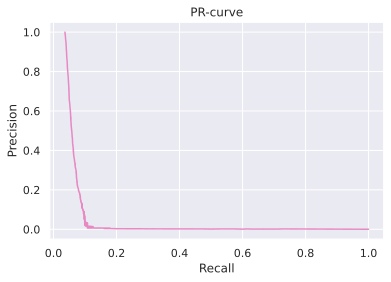

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
recall, precision, thresholds = precision_recall_curve(y_test, pipe.predict_proba(X_test)[:, 1])
plot = sns.lineplot(x=recall, y=precision, legend=False,
                    color=sns.color_palette("Set2")[3])
plot.set_xlabel("Recall")
plot.set_ylabel("Precision")
plot.set_title("PR-curve")
None

Видим некоторую гиперболическую зависимость, которая говорит о том, что чем больше precision тем меньше recall (причем намного меньше) это говорит о том, что наша модель не очень хорошо работает. Вероятно, это связано с большим дисбалансом классов.    
Также проинтепретируем recall и precision: предпочтительнее не выдать страховку чем выдать, что соответствует большому recall и низкому precision на нашем графике (мы меньше приобретем, зато намного меньше потеряем[в силу условия задачи]). Хотя , конечно, большой precision тоже важен, поскольку он определяет насколько много мы сможем заработать на "надежных" клиентах.

У нас есть алгоритм, который определяет вероятность обращения клиента по страховому случаю, но мы хотим использовать этот алгоритм, чтобы отказывать клиентам в обслуживании в страховой. Для этого нам нужны бинарные предсказания алгоритма. Давайте искать этот порог для получения бинарных предсказаний.

__Задание 11.__

__(0.5 балла)__

Предположим, что нам надо подобрать порог такой, чтобы среди наших положителных предсказаний 95\% действительно обратились бы по страховому случаю. Подберите соответствующий порог, оцените на нём precision, recall. Скажите, какой части потенциальных клиентов мы откажем?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
thres = thresholds[(precision >= 0.95)[1:]][-1]
print('threshold :', thres)
print('precision :', precision[(precision >= 0.95)][-1])
print('recall :', recall[(precision >= 0.95)][-1])
print('Откажем потенциальным клиентам, которые будут приносить нам доход\n',
      '(доля среди всех прибыльных клиентов) :',
      np.sum((y_test == 0) & (pipe.predict_proba(X_test)[:, 1] > thres)) / \
      np.sum(y_test == 0))

threshold : 0.019967053856627625
precision : 0.9500115713955103
recall : 0.03933499425067075
Откажем потенциальным клиентам, которые будут приносить нам доход
 (доля среди всех прибыльных клиентов) : 0.8738951552448527


Иногда сложно решить, какие значения precision и recall нужны в нашей задаче. Однако иногда можно оценить экономический эффект от нашего алгоритма. Мы знаем, во сколько нам обходится клиент, который обратился в страховую, и сколько нам приносит клиент, который не обратился. 

При фиксированном пороге мы знаем, кому мы бы отказали в обслуживании. Среди них есть те, кто обратился бы в страховую и нам пришлось бы потратить деньги, и те, кто не обратился бы, то есть принёс бы нам деньги. Мы можем посчитать разницу между нашими доходами и расходами от этой группы людей и надеяться, что она будет положительной. 

__Задание 12.__ Найдите такой порог, при котором наш баланс (разница между доходами и расходами на группе клиентов, которым мы отказали) неотрицательный. Доход, очевидно, считается только по тем людям, которым мы предполагаем что не отказали.

__(1 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
expenses = 100000
income = 5000
y_prob = pipe.predict_proba(X_test)[:, 1]
for thres in thresholds:
    y_pred = y_prob > thres
    TN = np.sum((y_pred == 0) & (y_test == 0))
    FN = np.sum((y_pred == 0) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))
    if (TN * income - FN * expenses - FP * income >= 0):
        print("Theshold if balance: ", thres)
        break

Theshold if balance:  0.03911502519790561


А на каком значение порога это разнциа максимальна? Скольким клиентам мы отказали в обслуживании?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

expenses = 100000
income = 5000
y_prob = pipe.predict_proba(X_test)[:, 1]
max = -1
hist = dict()
for thres in tqdm(thresholds):
    y_pred = y_prob > thres
    TN = np.sum((y_pred == 0) & (y_test == 0))
    FN = np.sum((y_pred == 0) & (y_test == 1))
    FP = np.sum((y_pred == 1) & (y_test == 0))
    diff = TN * income - FN * expenses - FP * income
    if (diff >= max) and (diff >= 0):
        hist['thres'] = thres
        hist['deny'] = np.sum((y_test == 0) & (y_pred == 1))
        max = diff 
print('Лучший threshold :', hist['thres'])
print('Откажем потенциальным клиентам, которые могли приносить нам доход\n :', 
      hist['deny'])

  0%|          | 0/118899 [00:00<?, ?it/s]

Лучший threshold : 0.07988752521156986
Откажем потенциальным клиентам, которые могли приносить нам доход
 : 3579


## Часть 5 (бонус). Vowpal Wabbit

В этой части мы научимся использовать библиотеку [vowpal wabbit](https://github.com/JohnLangford/vowpal_wabbit). У неё есть несколько особенностей:
- можно обучать только линейные модели, но за счёт большого количества опций и возможностей по усложнению, можно построить и довольно сложные вещи
- можно обучаться на выборках, которые не помещаются в оперативную память
- можно обрабатывать большое количество признаков (например, мешки слов текстов) и "на ходу" строить на них комбинации (не переделывать датасет)
- другие особенности, как например, активное обучение и возможность распараллеленного обучения.

Основные особенности при использовании следующие:
- Свой формат данных: "label |A feature1:value1 |B feature2:value2", позволяющий, во-первых, указывать не все признаки (не нужно хранить много нулей в разреженных данных), а во-вторых, группировать и иметь возможность отключать или взаимодействовать ("отключать", добавлять квадратичные признаки и т.д.) сразу со всей группой признаков. По этой причине вам понадобится реализовать конвертер датасета и загрузку своих предсказаний, чтобы посчитать качество предсказаний.
- Запуск обучения из командной строки (однако можно запускать эти же команды из ноутбука).

В этот раз мы будем использовать данные с конкурса [Kaggle Avazu Click-Through Rate Prediction](https://www.kaggle.com/c/avazu-ctr-prediction) по предсказанию кликов (бинарная классификация). В обучающей выборке 40kk строк, так что у вас не должно быть желания загружать их в оперативную память. Предлагается взять первые 30kk строк в качестве обучающей выборке и оставшуюся часть для тестирования.

<font color="red"> !!ВНИМАНИЕ!! ХАЛЯВНЫЕ БАЛЛЫ!! ЗАДАНИЕ НА 0.5 БАЛЛА НЕСЛОЖНОЕ И ОЧЕНЬ ПОЛЕЗНОЕ!!</font>

__Задание 13.__ Работа с vowpal wabbit. 

- Скачайте данные, разделите их на обучающую и тестовую выборки.
- Подготовьте функции для конвертирования датасета в формат vowpal wabbit и для загрузки предсказаний в ноутбук для подсчёта функционала.
- Сделайте простейшее решение на vowpal wabbit. Оцените качество.
- Изучите возможности и параметры vowpal wabbit. Поэксперементируйте. 
- Расскажите, что интересного вы узнали (какие-нибудь особенности, режимы работы, фишки, параметры).
- Удалось ли вам улучшить качество базовой модели? Насколько? Что ещё можно было бы попробовать?

В этом задании предусмотрены баллы по двум критериям:
- Мы видим, что вы **"поигрались" с vw**, а именно: запуск vw, обучение модели и предсказание ответов на нашем датасете (2-3 попытки обучения с разными параметрами, если не достигли 0.738), изменение значения/включения/выключения 2-3 параметров обучения с описанием того, что они делают. Несколько занимательных фактов и возможностей vowpal-wabbit __(0.5 балла)__.
- Достижение ROC-AUC на отложенной выборки более 0.738 __(1 балл)__

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ